In [349]:
#ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

## 【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。


<a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html">sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation</a>


データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html"> pandas.DataFrame — pandas 0.24.2 documentation </a>



In [286]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

X = pd.DataFrame(data=iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(data=iris_dataset.target, columns=["Species"])

In [287]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [288]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## 【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [298]:
df = pd.concat([X, y], axis=1)
df


,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。


<ul>
<li>先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）</li>

<li>ラベルごとのサンプル数の合計を出力する。</li>

<li>特徴量に欠損値があるかを確認する。</li>

<li>特徴量の平均値と標準偏差、四分位数を一度に表示させる。</li>
</ul>
DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。

In [81]:
#先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [109]:
#ラベルごとのサンプル数の合計を出力する
df["Species"].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [102]:
    # 特徴量に欠損値があるかを確認する。
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
Species         False
dtype: bool

In [71]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。

データセットを見る上で、そのデータセット自体について知っておくことも大切です。

<ul>
<li>データの数：150データセット</li>
<li>特徴量について　４つ</li>
    speal length：ガクの長さ<br>
    speal width ：ガクの幅<br>
    petal length：花弁の長さ<br>
    petal width ：花弁の幅<br>
<li>クラスについて</li>
    0：<a href="https://ja.wikipedia.org/wiki/%E3%83%92%E3%82%AA%E3%82%A6%E3%82%AE%E3%82%A2%E3%83%A4%E3%83%A1">iris-setosa</a>:　高さは70ｃｍほどになる。日本では本州の高山の湿地に自生し、７月から８月にかけて開花する。緑の葉に紫色の花をもつ <br>
    1：<a href="https://en.wikipedia.org/wiki/Iris_versicolor">iris-versicolor</a>：高さ10〜80 cm。アメリカやカナダの東部によくみられる。<br>
    2：<a href="https://en.wikipedia.org/wiki/Iris_virginica">ieis-virginica</a>：アメリカの南東部によくみられる。花びらとがく片の色は、濃い紫からピンクがかった白までさまざまです<br>
</ul>

## 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

<ul>
    <li>sepal_widthの列を３つの異なる方法で抽出する</li>
<li>50番目から99番目までのデータを抽出する</li>
<li>petal_lengthの列の50番目から99番目までのデータを抽出する</li>
<li>petal_widthの値が0.2のデータを抽出する</li>
</ul>
.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。
　<p style="color: red;">⇒「.iloc」はDataFrameの行および列のインデックス番号を指定し抽出する<br>
 　 「.loc」はDataFrameの行および列の名前を指定し抽出する</p>

In [90]:
# sepal_widthの列を３つの異なる方法で抽出する
#①DataFrame型で抽出する
df[["sepal_width"]]

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


In [91]:
#②ilocで抽出する
df.iloc[:, 1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [92]:
#③locで抽出する
df.loc[:, "sepal_width"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [93]:
#50番目から99番目までのデータを抽出する
df.iloc[50:100, :]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [95]:
#petal_lengthの列の50番目から99番目までのデータを抽出する
df.loc[50:100, ["petal_length"]]

,petal_length
50,4.7
51,4.5
52,4.9
53,4.0
54,4.6
55,4.5
56,4.7
57,3.3
58,4.6
59,3.9


In [96]:
#petal_widthの値が0.2のデータを抽出する
df[df["petal_width"] == 0.2]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


## 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。

作図のライブラリはMatplotlibの他seabornもよく使われます。

<ul>
    <li><a href="https://chusotsu-program.com/matplotlib-pie/">ラベルごとのサンプル数を円グラフにする</a>（パーセンテージまで表示する）</li>
<li>特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する</li>
<li>特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する</li>
</ul>

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。
<p style="color:red;">⇒箱ひげ図：データが持つ性格を、代表的な統計値を用いて、視覚的にわかりやすく表現し比較しやすくする。複数の母集団を同時に扱えるため、複数データのばらつきを並べて比較するために重宝する<br>
  バイオリン図：性格は箱ひげ図と似ているが箱ひげ図と比べより多くの情報が含まれる。特にデータの確率分布をバイオリン状に図で表現されるため把握しやすい。但し、知名度の低いマイナーな統計図のためバイオリン図を知らない人にとっては理解されにくい</p>
  
 <img src="https://udemy.benesse.co.jp/wp-content/uploads/image1-3.png" width="300px">

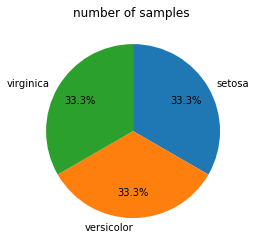

In [207]:
# ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
label=iris_dataset.target_names

plt.pie(df["Species"].value_counts(),
        labels=label, counterclock=False,
        startangle=90, autopct="%1.1f%%", pctdistance=0.7)
plt.title("number of samples ")
plt.show()

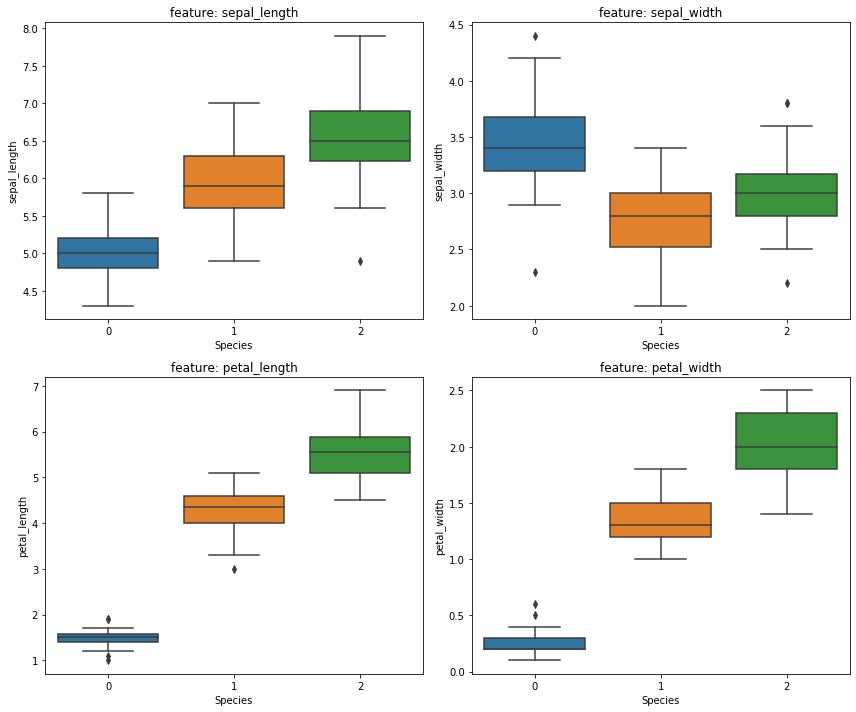

In [236]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
fig, ax = plt.subplots(2,2, figsize=(12,10))

sns.boxplot(x="Species", y="sepal_length", data=df, ax=ax[0, 0])
ax[0, 0].set_title("feature: sepal_length")

sns.boxplot(x="Species", y="sepal_width", data=df, ax=ax[0, 1])
ax[0, 1].set_title("feature: sepal_width")

sns.boxplot(x="Species", y="petal_length", data=df, ax=ax[1, 0])
ax[1, 0].set_title("feature: petal_length")

sns.boxplot(x="Species", y="petal_width", data=df, ax=ax[1, 1])
ax[1, 1].set_title("feature: petal_width")

plt.tight_layout()
plt.show()

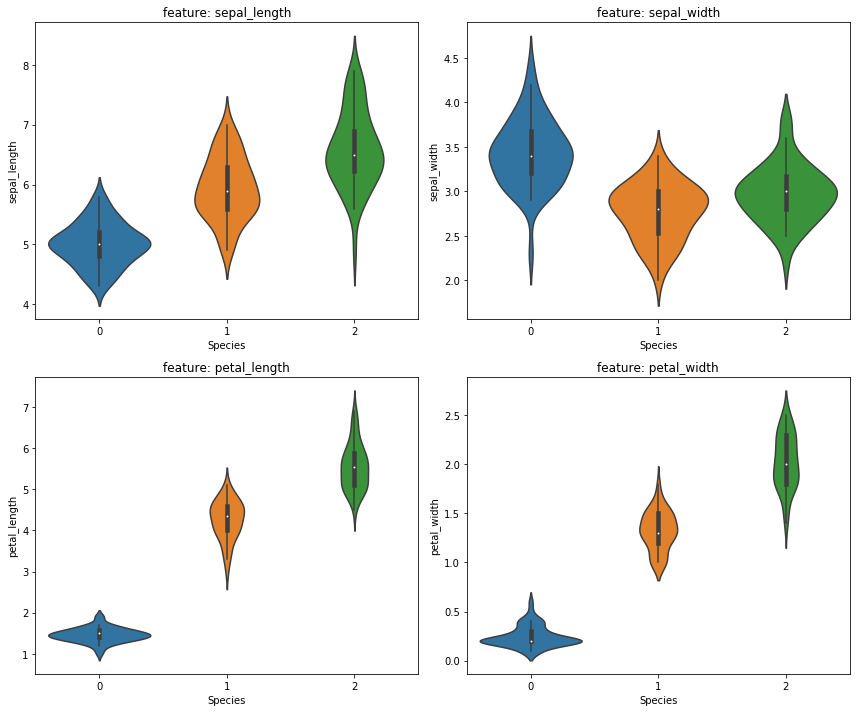

In [239]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.violinplot(x="Species", y="sepal_length", data=df, ax=ax[0, 0])
ax[0, 0].set_title("feature: sepal_length")

sns.violinplot(x="Species", y="sepal_width", data=df, ax=ax[0, 1])
ax[0, 1].set_title("feature: sepal_width")

sns.violinplot(x="Species", y="petal_length", data=df, ax=ax[1, 0])
ax[1, 0].set_title("feature: petal_length")

sns.violinplot(x="Species", y="petal_width", data=df, ax=ax[1, 1])
ax[1, 1].set_title("feature: petal_width")

plt.tight_layout()
plt.show()

In [215]:
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。

<ul>
    <li>縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る</li>
<li>全ての組み合わせの散布図を一度に表示させる、散布図行列を作る</li>
<li>４つの特徴量に関する相関係数行列を作る</li>
<li>相関係数行列のヒートマップを作る</li>
</ul>    

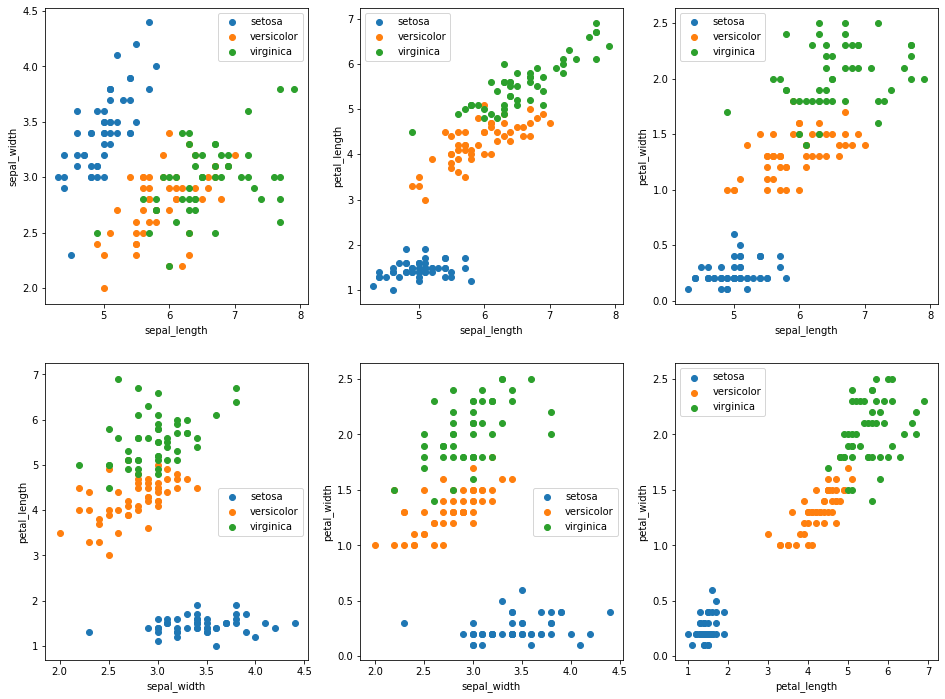

In [359]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
features = list(itertools.combinations(X.columns, 2)) # 特徴量の組み合わせを取得
groups = df.groupby("Species") # 目的変数でdfをグループ分け

fig = plt.figure(figsize=(16,12))
axes=[]

for i in range(1,len(features) + 1):
    axes.append(fig.add_subplot(2, 3, i))
    
    for val, df_sp in groups:
        axes[i-1].scatter(df_sp[features[i-1][0]], df_sp[features[i-1][1]], label=iris_dataset.target_names[val])
        axes[i-1].set_xlabel(features[i-1][0])
        axes[i-1].set_ylabel(features[i-1][1])
        axes[i-1].legend()
        
plt.show()

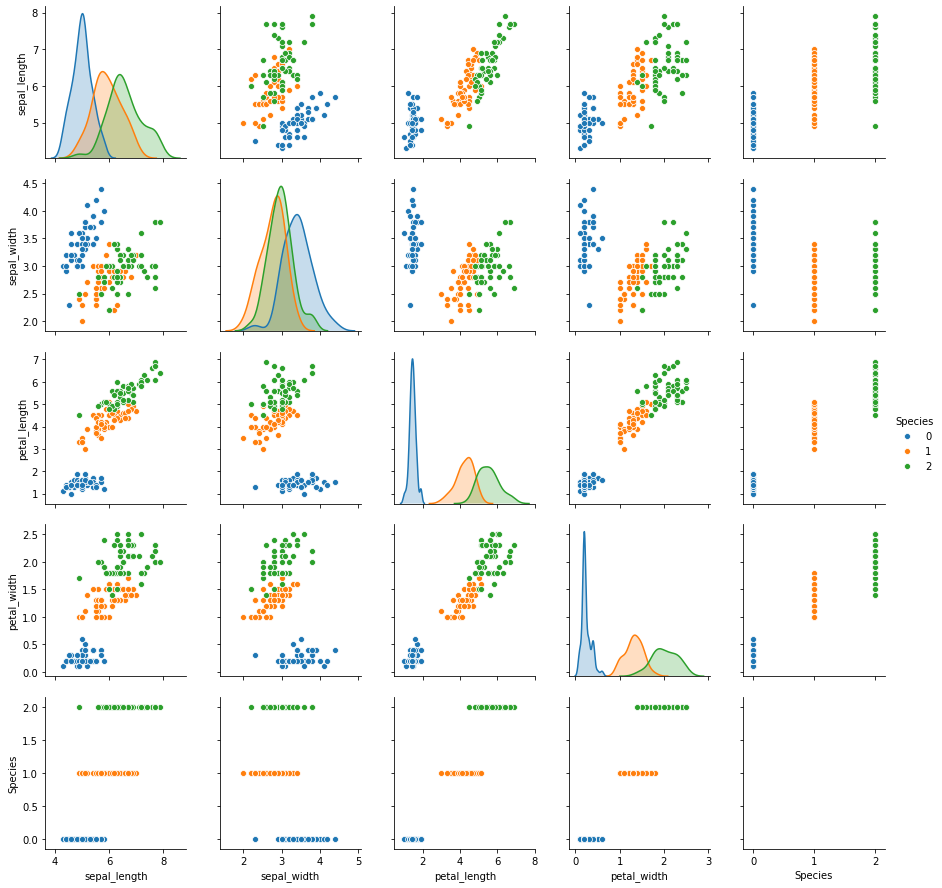

In [366]:
#全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
sns.pairplot(data=df, hue="Species")
plt.show()

In [368]:
# ４つの特徴量に関する相関係数行列を作る
corr_mat = df.iloc[:, 0:4].corr()
corr_mat

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


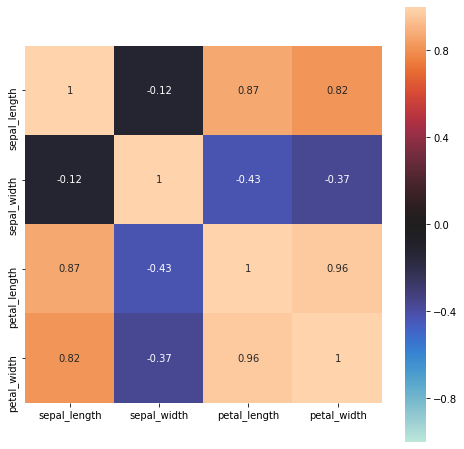

In [391]:
# 相関係数行列のヒートマップを作る
plt.figure(figsize=(8,8))
sns.heatmap(corr_mat, vmin=-1.0, vmax=1.0, center=0, annot=True,  square=True)
plt.ylim(len(corr_mat), 0)
plt.show()

## 【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。

例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。


### 考察
<br>
分析結果より、「Iris Setosa」は他のアヤメ２種と比較してガク・花弁の特徴が大きく異なることがまず目につく。<br>
ガクの幅、花弁の幅・長さは他の２種に比べて２倍以上小さいが、ガクの長さは1.5倍程度大きい。

「Iris versicolor」と「Iris virginica」はガク・花弁の長さ・幅の特徴については似た性質を持つことがわかる。<br>
ガクの幅はほとんど同程度であるが、その他の特徴については、「Iris virginica」がやや長い特徴を持つ。

以上のことより、まず【ガクの長さ】を観察することで、「Iris Setosa」かその他２種かを選別できる。<br>
その後、他の特徴を比べることにより「Iris versicolor」と「Iris virginica」を選別することができる。
